In [2]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import pandas as pd
import numpy as np
import os

In [3]:
tf.__version__

'2.10.1'

In [14]:
sesh = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6



In [15]:
tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [16]:
# Define the directory where your files are located
directory = "../data/raw/train/"

# Iterate through the files in the directory
for filename in os.listdir(directory):
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(directory, filename)):
        # Split the filename by '.' to get the parts
        parts = filename.split('.')
        # Check if the filename has at least two parts and the second part is a valid integer
        if len(parts) >= 2 and parts[1].isdigit():
            # Construct the new filename without the prefix
            new_filename = parts[0] + parts[1] + "." + parts[-1]
            # Rename the file
            os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))

In [17]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory="../data/raw/train/",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="../data/raw/test/",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# normalize
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

In [19]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# create cnn model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 34s 46ms/step - loss: 0.6297 - accuracy: 0.6312 - val_loss: 0.5253 - val_accuracy: 0.7410
Epoch 2/10
625/625 [==============================] - 28s 44ms/step - loss: 0.4854 - accuracy: 0.7632 - val_loss: 0.4507 - val_accuracy: 0.7926
Epoch 3/10
625/625 [==============================] - 28s 45ms/step - loss: 0.3827 - accuracy: 0.8259 - val_loss: 0.4484 - val_accuracy: 0.8046
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 0.2461 - accuracy: 0.8949 - val_loss: 0.5450 - val_accuracy: 0.7984
Epoch 5/10
625/625 [==============================] - 28s 44ms/step - loss: 0.1241 - accuracy: 0.9521 - val_loss: 0.8080 - val_accuracy: 0.7950
Epoch 6/10
625/625 [==============================] - 28s 44ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 0.8692 - val_accuracy: 0.7846
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 0.0519 - accuracy: 0.9809 - val_loss: 1.0110 - val_accuracy:

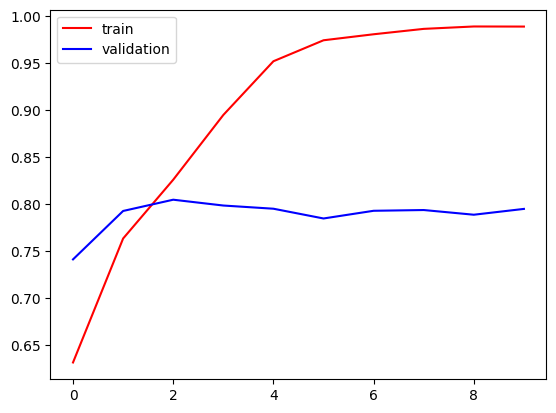

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

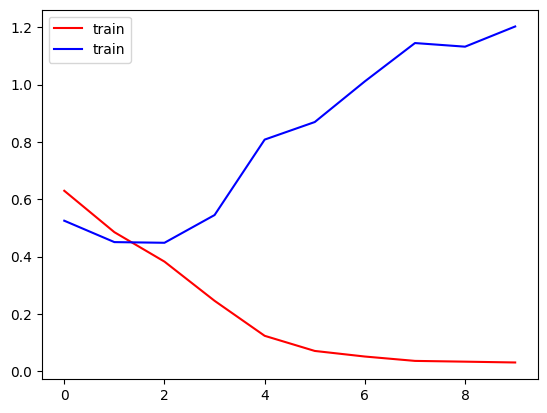

In [27]:
plt.plot(history.history['loss'], color='red', label='train loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.legend()
plt.show()

- Overfitting
- Ways to reduce overfitting:
    - Add more data
    - Data augmentation
    - L1/L2 regularizer
    - Dropout
    - Batch Norm
    - Reduce complexity

In [28]:
from keras.layers import BatchNormalization, Dropout

In [88]:
# create cnn model
better_model = Sequential()

better_model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
better_model.add(BatchNormalization())
better_model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

better_model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
better_model.add(BatchNormalization())
better_model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

better_model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
better_model.add(BatchNormalization())
better_model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

better_model.add(Flatten())

better_model.add(Dense(128, activation='relu'))
better_model.add(Dropout(0.1))
better_model.add(Dense(64, activation='relu'))
better_model.add(Dropout(0.1))
better_model.add(Dense(1, activation='sigmoid'))

In [89]:
better_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [90]:
better_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
history2 = better_model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10


KeyboardInterrupt: 

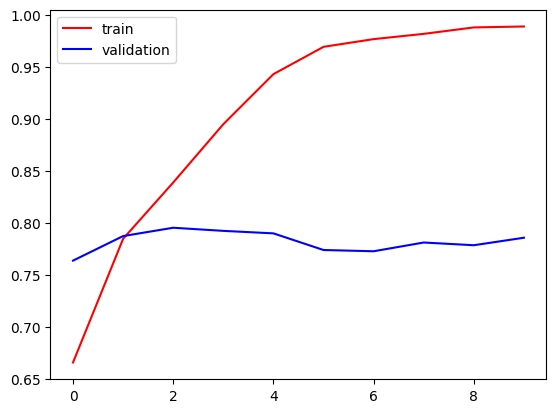

In [ ]:
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

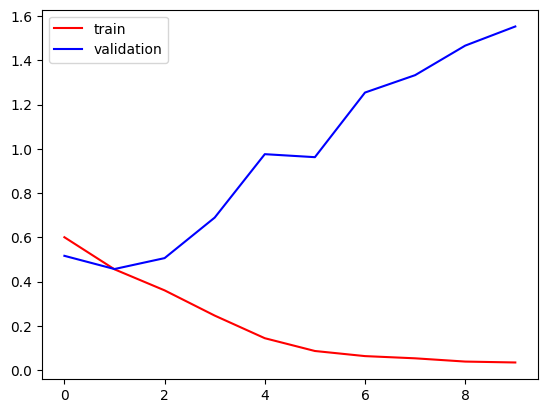

In [ ]:
plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('../data/raw/test/cats/cat.18.jpg')

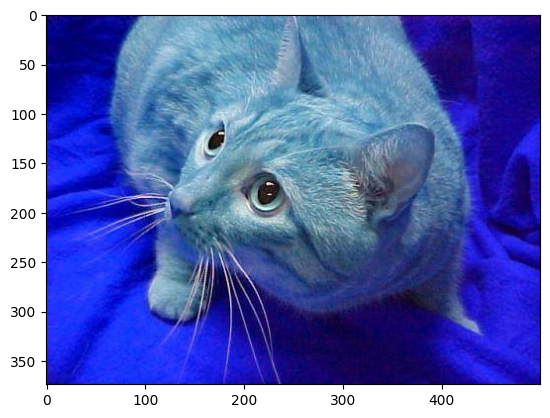

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(374, 500, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
better_model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('../data/raw/test/dogs/dog.5.jpg')

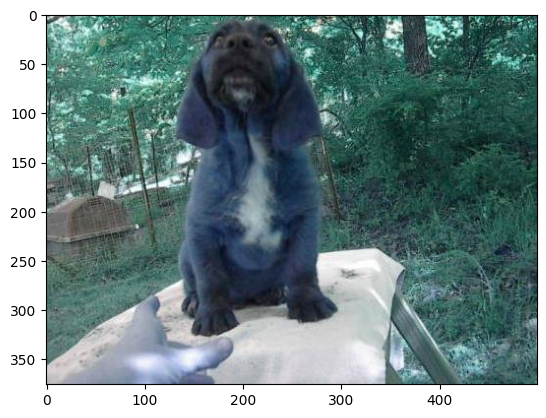

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(376, 499, 3)

In [ ]:
test_img2 = cv2.resize(test_img, (256, 256))

In [ ]:
test_input2 = test_img2.reshape((1, 256, 256, 3))

In [ ]:
better_model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)